<a href="https://colab.research.google.com/github/Himangi-77/excelR-assignments/blob/main/ASSIGNMENT13_KNN_GLASSCLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)

1 -- building_windows_float_processed

2 --building_windows_non_float_processed

3 --vehicle_windows_float_processed

4 --vehicle_windows_non_float_processed (none in this database)

5 --containers

6 --tableware

7 --headlamps






In [10]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.Type.unique()

array([1, 2, 3, 5, 6, 7])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
x=data.iloc[:,0:9]
y=data.iloc[:,9]

In [27]:
kfold = KFold(n_splits=10,random_state=42,shuffle=True)
model = KNeighborsClassifier(n_neighbors=23)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.6411255411255411


GRID SEARCH FOR FINE TUNING ALGORITHM

In [14]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [28]:
model_1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model_1,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [29]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


Visualizing the CV Results

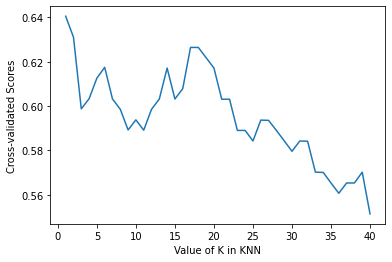

In [31]:
k_range = range(1,41)
k_score = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn,x,y,cv=5)
  k_score.append(scores.mean())

plt.plot(k_range,k_score)
plt.xlabel('Value of K in KNN')
plt.ylabel('Cross-validated Scores')
plt.show()